# Getting data from the web:  Scraping

Our trusty friend Pandas can read data directly from a web link.

We read the dataset into a dataframe without actually having the file in our folder!

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/classics/classics.csv')

In [3]:
df.sample()

,bibliography.congress classifications,bibliography.languages,bibliography.subjects,bibliography.title,bibliography.type,metadata.downloads,metadata.id,metadata.rank,metadata.url,bibliography.author.birth,...,metrics.sentiments.polarity,metrics.sentiments.subjectivity,metrics.statistics.average letter per word,metrics.statistics.average sentence length,metrics.statistics.average sentence per word,metrics.statistics.characters,metrics.statistics.polysyllables,metrics.statistics.sentences,metrics.statistics.syllables,metrics.statistics.words
268,Z,en,"Classification, Dewey decimal",A Classification and Subject Index for Catalog...,Text,1244,12513,269,https://www.gutenberg.org/ebooks/12513,1851,...,0.061563,0.27629,6.07,22.0,0.04,94731,1577,687,22445.1,15596


<Axes: ylabel='bibliography.title'>

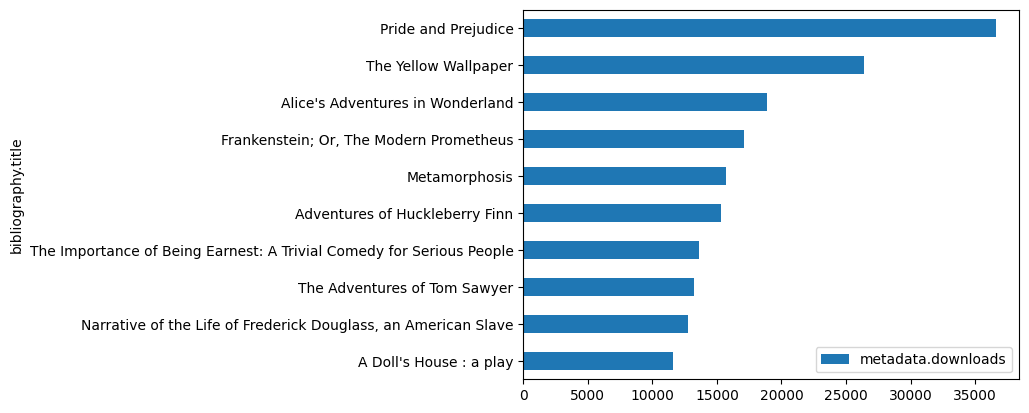

In [4]:
df.sort_values(by='metadata.downloads',ascending=True)[-10:].plot.barh(x='bibliography.title',y='metadata.downloads')

---

## requests

The above code is very handy, but what if we simply want to read content that is on the page rather than in a readily available file?

Go to the [Classics CSV File](https://corgis-edu.github.io/corgis/csv/classics/) webpage and use your Browser's Inspector to look at the HTML for the page.  This will show HTML we discussed very briefly during our first classes.

We are going to get the entire web page using "requests" ([documentation](https://docs.python-requests.org/en/latest/)).  
* "Requests is an elegant and simple HTTP library for Python, built for human beings."

In [3]:
import requests

In [4]:
response = requests.get('https://corgis-edu.github.io/corgis/csv/classics/')

In [5]:
response

<Response [200]>

"Responses" are numerical codes that indicate whether a specific HTTP request has been successfully completed (See [HTTP code list](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status))

You may have run into a couple of these on other sites, or even while trying to login to this JupyterHub!

In [6]:
# Note that this won't actually get the csv file

response = requests.get('https://corgis-edu.github.io/corgis/csv/classics/classics.csv')

In [7]:
response

<Response [404]>

Try finding the above URL in your browser:  https://corgis-edu.github.io/corgis/csv/classics/classics.csv

In [8]:
response = requests.get('https://corgis-edu.github.io/corgis/csv/classics/')
print(response)

<Response [200]>


In [9]:
# The html of our desired corgis page:
response.text

'<!DOCTYPE html>\n<html lang="en-US">\n    <head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\n\n    \n    \n\n    <title>CORGIS Datasets Project</title>\n    <meta name="description" content="\n\n\n\n\n\n\n            Github Pages for CORGIS Datasets Project">\n    <link rel="canonical" href="https://corgis-edu.github.io//corgis/csv/classics/">\n\n    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css">\n    <link rel="stylesheet" href="https://code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">\n    <link rel="stylesheet" href="/corgis/assets/css/main.css">\n\n    \n\n    \n        <link rel="stylesheet" href="/corgis/assets/css/pygments.css">\n\n        <style>\n            .ui-dialog-titlebar-close {\n                padding: 0 !important;\n            }\n\n            .ui-dialog-titlebar-close:af

In [10]:
print(response.text)

<!DOCTYPE html>
<html lang="en-US">
    <head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">

    
    

    <title>CORGIS Datasets Project</title>
    <meta name="description" content="






            Github Pages for CORGIS Datasets Project">
    <link rel="canonical" href="https://corgis-edu.github.io//corgis/csv/classics/">

    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css">
    <link rel="stylesheet" href="https://code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">
    <link rel="stylesheet" href="/corgis/assets/css/main.css">

    

    
        <link rel="stylesheet" href="/corgis/assets/css/pygments.css">

        <style>
            .ui-dialog-titlebar-close {
                padding: 0 !important;
            }

            .ui-dialog-titlebar-close:after {
                content: '';
 

In all likelihood, we won't want all this html.  We will only want particular pieces of it.  Maybe the text of a screenplay, or an article, or the lyrics of a song...

Fortunately, there's a Python library for extracting these pieces from a web page:  **BeautifulSoup**

"BeautifulSoup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work."
-- [documentation](https://beautiful-soup-4.readthedocs.io/en/latest/)

In [11]:
from bs4 import BeautifulSoup

In [12]:
# Save all the html in a string variable
html_string = response.text

# Use BeautifulSoup to create a new object that will allow you to search for HTML tags
document = BeautifulSoup(html_string, "html.parser")

# This "document" variable is an object that has a "find" method
document.find('a')

<a href="mailto:acbart@vt.edu">acbart@vt.edu</a>

What is `<a href="...`?

-> This is an HTML tag.... so what are HTML "tags"?

HTML: Hyper-Text Markup Language

HTML uses "tags" to classify different elements, for example:
* `<h1>...</h1>`: a large header
* `<img src="...">`: an image
* `<a href="...">Deep Space Nine</a>`: a link

Let's look at a simpler website:
http://static.decontextualize.com/kittens.html
* This toy website was made by Prof. Allison Parrish explicitly for the purposes of teaching BeautifulSoup.

In [13]:
response = requests.get('http://static.decontextualize.com/kittens.html')

In [14]:
print(response.text)

<!doctype html>
<html>
	<head>
		<title>Kittens!</title>
		<style type="text/css">
			span.lastcheckup { font-family: "Courier", fixed; font-size: 11px; }
		</style>
	</head>
	<body>
		<h1>Kittens and the TV Shows They Love</h1>
		<div class="kitten">
			<h2>Fluffy</h2>
			<div><img src="http://placekitten.com/120/120"></div>
			<ul class="tvshows">
				<li>
					<a href="http://www.imdb.com/title/tt0106145/">Deep Space Nine</a>
				</li>
				<li>
					<a href="http://www.imdb.com/title/tt0088576/">Mr. Belvedere</a>
				</li>
			</ul>
			Last check-up: <span class="lastcheckup">2014-01-17</span>
		</div>
		<div class="kitten">
			<h2>Monsieur Whiskeurs</h2>
			<div><img src="http://placekitten.com/110/110"></div>
			<ul class="tvshows">
				<li>
					<a href="http://www.imdb.com/title/tt0106179/">The X-Files</a>
				</li>
				<li>
					<a href="http://www.imdb.com/title/tt0098800/">Fresh Prince</a>
				</li>
			</ul>
			Last check-up: <span class="lastcheckup">2013-11-02</span>
		</div

Here are some tag examples:
* `<h1>Kittens and the TV Shows They Love</h1>`: a large header
* `<img src="http://placekitten.com/120/120">`: an image
* `<a href="http://www.imdb.com/title/tt0106145/">Deep Space Nine</a>`: a link

And you'll see additional tags:
* `<ul>`: unordered list
* `<li>`: list item
* `<head>` and `<body>`: like header information and the body of a document
* `<div>`: section of the document

There's a lot to learn about HTML, but this is mainly to show you examples of tags.  BeautifulSoup will let you parse HTML documents based on these tags.

In [15]:
# Save all the html in a string variable
html_string = response.text

# Use BeautifulSoup to create a new object that will allow you to search for HTML tags
document = BeautifulSoup(html_string, "html.parser")

# Find the title:
# Up above, we see that the title is surrounded by the "h1" tag
document.find('h1')

<h1>Kittens and the TV Shows They Love</h1>

In [16]:
# Just want the text?  Use .text
document.find('h1').text

'Kittens and the TV Shows They Love'

In [17]:
# You can find the kitten names too.  Those are included with "h2" tags.
document.find('h2')

<h2>Fluffy</h2>

In [18]:
# But if you want to find _all_ of them, then use find_all
document.find_all('h2')

[<h2>Fluffy</h2>, <h2>Monsieur Whiskeurs</h2>]

In [19]:
# For these you can't use a simple .text
# This will give an error
document.find_all('h2').text

AttributeError: ResultSet object has no attribute 'text'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [20]:
# You need to use .text on each individual item
for i in document.find_all('h2'):
    print(i)
    print(i.text)

<h2>Fluffy</h2>
Fluffy
<h2>Monsieur Whiskeurs</h2>
Monsieur Whiskeurs


In [ ]:
# You need to use .text on each individual item
kitten_names = []
for i in document.find_all('h2'):
    kitten_names.append(i.text)
kitten_names

In [ ]:
# We can also find all the images:
document.find_all("img")

In [ ]:
# Here, the important info is not text printed on the page, 
# it's a link to the pic
# (try going to one)
# how do we get these? -> treat it like the key of a dictionary

for i in document.find_all("img"):
    print(i)
    print(i['src'])

---

Fun aside:  you can use the IPython library to visualize HTML right inside the Jupyter notebook.

In [ ]:
from IPython.core.display import HTML
HTML('<img src="http://placekitten.com/120/120">')

In [ ]:
%%HTML
<img src="http://placekitten.com/120/120">

In [ ]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('Awf45u6zrP0')

---

In [ ]:
HTML(str(document.find("img")))

In [ ]:
# another thing we may want to try out
# is getting all of the links
links = []
for i in document.find_all("a"):
    links.append(i['href'])
links

Ok, enough cat silliness...

---

Back to our literary classics.

In [ ]:
response = requests.get('https://corgis-edu.github.io/corgis/csv/classics/')
html_string = response.text
document = BeautifulSoup(html_string, "html.parser")

In [ ]:
# We can look for the first link:

document.find('a')

In [ ]:
# We can search for all the links on the page with:

document.find_all('a')

This allows us now to find the download link for the csv file.
* What are the ".."?  The ".." say to go up to a higher-level directory.  
* Here, if the web page that we were visiting was https://corgis-edu.github.io/corgis/csv/classics/ and the link specification contained `href="../../datasets/csv/classics/classics.csv"`, then the resulting link would be https://corgis-edu.github.io/corgis/csv/classics/../../datasets/csv/classics/classics.csv => https://corgis-edu.github.io/corgis/datasets/csv/classics/classics.csv

In [ ]:
classicslinks = document.find_all('a')
for i in classicslinks:
    print(i['href'])
    print(i.text)
    if i.text == 'classics.csv':
        print('I found the link:')
        print(i['href'])

Beware the whitespace!

In [ ]:
classicslinks = document.find_all('a')
for i in classicslinks:
    print(i['href'])
    print(i.text)
    if i.text == 'classics.csv ':
        print('I found the link:')
        print(i['href'])

In [ ]:
classicslinks = document.find_all('a')
for i in classicslinks:
    if 'classics.csv' in i.text:
        print('I found the link:')
        print(i['href'])
        url = 'https://corgis-edu.github.io/corgis/csv/classics/' + i['href']

print(url)

In [ ]:
classics_df = pd.read_csv(url)

In [ ]:
classics_df

In [ ]:
classics_df.sort_values(by='metadata.downloads',ascending=True)[-10:].plot.barh(x='bibliography.title',y='metadata.downloads')

# A few more examples for practice

### Getting the script of Coco from IMSDB

In [ ]:
import requests

In [ ]:
response = requests.get('https://imsdb.com/scripts/Coco.html')

In [ ]:
response

In [ ]:
response.text

Woah, too much!

We break it down with BeautifulSoup

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
html_string = response.text
document = BeautifulSoup(html_string, "html.parser")

In [ ]:
document

`document` itself is still the original HTML

In [ ]:
type(document)

In [ ]:
document.find('pre')

There is still a lot of formatting to work through, but we have now found the screenplay text.

In [ ]:
print(document.find('pre').text)

### Grabbing data from GitHub

Let's look at a problematic example.
* This illustrates one complication you may run into:  dealing with dynamic content

The repository lists of the Pandas-relevant organization are linked on "https://github.com/orgs/pandas-dev/repositories".  Let's see about getting the links on that page in order to identify the organization's repositories.

In [ ]:
import requests

In [ ]:
response = requests.get('https://github.com/orgs/pandas-dev/repositories')

In [ ]:
response

In [ ]:
html_string = response.text

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
document = BeautifulSoup(html_string, "html.parser")

In [ ]:
document.find_all('a')

In [ ]:
document

One cannot simply use `requests` for this site.  The `requests` library is intended for static content, and it cannot directly handle dynamic content that is rendered by JavaScript in the browser. To scrape dynamic content, you'll need other libraries and tools, for example, `selenium`, `playwright`, or `scrapy`.

### Books To Scrape
* https://books.toscrape.com/ -- a website that loves to be scraped!

In [ ]:
url = 'http://books.toscrape.com/'

In [ ]:
# Send a GET request to the page
response = requests.get(url)

In [ ]:
response

In [ ]:
# Parse the page content
soup = BeautifulSoup(response.text, 'html.parser')

In [ ]:
# Find all book titles and their links
books = soup.find_all('article', class_='product_pod')

In [ ]:
books[0]

In [ ]:
books[0].find('h3')

In [ ]:
books[0].h3

In [ ]:
books[0].a

In [ ]:
for book in books:
    title = book.a.img['alt']
    link = book.a['href']
    print("Title: ", title, ", Link: ", url + link)

In [ ]:
books[0].find('p', attrs={'class':"price_color"})

In [ ]:
books[0].find('p', attrs={'class':"price_color"}).text

In [ ]:
for book in books:
    title = book.h3.a['title']
    price = book.find('p', attrs={'class':"price_color"}).text
    print(title, ": ", price[1:])